In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name_email_data = pd.read_csv('name_email_business_details.csv')

In [3]:
name_email_data = name_email_data.fillna('')

In [ ]:
name_email_data.head()

In [4]:
def remove_salutation(txt):
    special_characters = [',','@','_']
    for sp in special_characters:
        txt = txt.replace(sp," ")
    txt = txt.lower()
    txt = ' '.join(txt.split()) #Replace multiple spaces with single space
    salutation = ['mr. ','dr ','mrs. ','miss ','mr ','mrs ','dr. ','sir ']
    for sals in salutation:
        if sals in txt:
            txt = txt.replace(sals,'')
    txt = ''.join([i for i in txt if not i.isdigit()]) #Converting names to just character only
    return txt

In [5]:
def extract_domain_name(email):
    if email and '@' in email:
            if len(email.split("@"))>1:
                domain = email.split("@")[1].split(".")[0]
            return domain.lower()
    else:
        return email

In [6]:
def modify_business_name(txt):
    special_characters = ['.','@','_']
    for sp in special_characters:
        txt = txt.replace(sp," ")
    txt = txt.lower()
    txt = ''.join(txt.split()) #Replace multiple spaces with single space
    txt = ''.join([i for i in txt if not i.isdigit()]) #Converting names to just character only
    return txt

In [7]:
def extract_text_from_email(email):
    new_email = ''
    if email:
        email = email.split("@")[0]
        for characters in email:
            if characters.isalpha():
                new_email +=characters
    return new_email.lower()

In [8]:
def get_all_substrings(input_string):
    length = len(input_string)
    return [input_string[0:j] for j in range(1,length+1)]

In [9]:
def count_of_namesubstring_in_email(substring_names,email):
    temp_list = []
    index_list = []
    for names in substring_names:
        temp_list.append(names in email)
    if temp_list:
        index_list = [i for i, x in enumerate(temp_list) if x]
        if index_list:
            return max(index_list)+1
        else:
            return 0
    else:
        return 0

In [10]:
def similarity_name_email (detail):
    full_name,email = detail
    if len(email):
        if full_name.count(' ') >= 2:
            f_name = full_name.split(' ')[0]
            m_name = full_name.split(' ')[1]
            s_name = full_name.split(' ')[2]
            fname_similarity = count_of_namesubstring_in_email(get_all_substrings(f_name),email)/float(len(email))
            mname_similarity = count_of_namesubstring_in_email(get_all_substrings(m_name),email)/float(len(email))
            sname_similarity = count_of_namesubstring_in_email(get_all_substrings(s_name),email)/float(len(email))
            if int((fname_similarity + mname_similarity + sname_similarity)*100) > 100:
                return 100
            else:
                return int((fname_similarity + mname_similarity + sname_similarity)*100)
            
        if full_name.count(' ') == 1:
            f_name = full_name.split(' ')[0]
            s_name = full_name.split(' ')[1]
            fname_similarity = count_of_namesubstring_in_email(get_all_substrings(f_name),email)/float(len(email))
            sname_similarity = count_of_namesubstring_in_email(get_all_substrings(s_name),email)/float(len(email))
            if int((fname_similarity + sname_similarity)*100) > 100:
                return 100
            else:
                return int((fname_similarity + sname_similarity)*100)
        else:
            name_similarity = count_of_namesubstring_in_email(get_all_substrings(full_name),email)/float(len(email))
            return int(name_similarity*100)
    else:
        return 0

In [11]:
def similarity_businessname_email(detail):
    business_name,email = detail
    if len(email):
        bname_similarity = count_of_namesubstring_in_email(get_all_substrings(business_name),email)/float(len(email))
        return int((bname_similarity*100))
    else:
        return 0

In [12]:
def similarity_businessname_domain(detail):
    business_name,domain = detail
    if len(domain):
        bname_similarity = count_of_namesubstring_in_email(get_all_substrings(business_name),domain)/float(len(domain))
        return int((bname_similarity*100))
    else:
        return 0

In [13]:
def max_similar_score(scores):
    score1, score2,score3 = scores
    return max(score1,score2,score3)

In [14]:
name_email_data.loc[:,"name1"] = name_email_data['name'].apply(remove_salutation)

In [15]:
name_email_data.loc[:,"business_name1"] = name_email_data['business_name'].apply(modify_business_name)

In [16]:
name_email_data.loc[:,"new_email"] = name_email_data['email'].apply(extract_text_from_email)

In [17]:
name_email_data.loc[:,"domain_name"] = name_email_data['email'].apply(extract_domain_name)

In [18]:
name_email_data = name_email_data.drop(['name','email','business_name'], 1).\
rename(columns={'name1': 'name','new_email': 'email','business_name1':'business_name'})

In [ ]:
name_email_data.head()

In [19]:
name_email_data['name_similarity_score'] = name_email_data[['name','email']].apply(similarity_name_email,axis=1)

In [ ]:
name_email_data.head()

In [20]:
name_email_data['business_name_similarity_score'] = name_email_data[['business_name','email']].\
apply(similarity_businessname_email,axis=1)

In [ ]:
name_email_data.head()

In [21]:
name_email_data['business_domain_similarity_score'] = name_email_data[['business_name','domain_name']].\
apply(similarity_businessname_domain,axis=1)

In [ ]:
name_email_data.head()

In [22]:
name_email_data['final_score'] = name_email_data[['name_similarity_score','business_name_similarity_score',\
                                                  'business_domain_similarity_score']]\
                                .apply(max_similar_score,axis=1)

In [ ]:
name_email_data.head(10)

In [23]:
print "Total Number of rows in the dataset = " +str(name_email_data['final_score'].count())

Total Number of rows in the dataset = 30094


In [24]:
x = name_email_data['final_score']

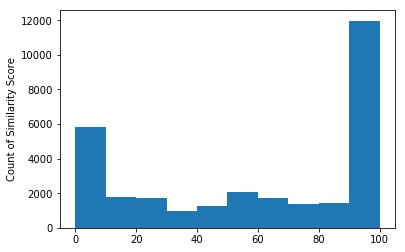

In [25]:
plt.hist(x, bins=10)
plt.ylabel('Count of Similarity Score');

In [ ]:
name_email_data[name_email_data['final_score'] == 100].head()

In [26]:
Nr100 = name_email_data[name_email_data['final_score'] == 100].shape[0]
Dr = name_email_data['final_score'].shape[0]
print "Percentage of records with 100% similarity = ", str((Nr100/float(Dr)*100))

Percentage of records with 100% similarity =  37.9976074965


In [ ]:
name_email_data[name_email_data['final_score'] == 0].head()

In [27]:
Nr0 = name_email_data[name_email_data['final_score'] == 0].shape[0]
Dr = name_email_data['final_score'].shape[0]
print "Percentage of records with 0% similarity = ", str((Nr0/float(Dr)*100))

Percentage of records with 0% similarity =  15.298730644


In [ ]:
name_email_data[(name_email_data['final_score'] >= 20) &(name_email_data['final_score'] <= 30)].head()

In [28]:
Nr40plus = name_email_data[name_email_data['final_score'] >= 40].shape[0]
Dr = name_email_data['final_score'].shape[0]
print "Percentage of records greater than 40% similarity = ", str((Nr40plus/float(Dr)*100))

Percentage of records greater than 40% similarity =  65.7506479697


In [ ]:
name_email_data.iloc[189,:]